In [133]:
from pysat.solvers import Glucose3
from pysat.formula import CNF
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import combinations
import numpy as np
import random
import time

In [17]:
# KN(k,n) = U(k,n) ^ L(k,n)
# KN(k,n): k out of n adjacent unknown squares are mines
# U(k,n): At most k out of n squares contain a mine
# L(k,n): At least k out of n squares contain a mine

# Conversion to at least
# The proposition holds True if and only if k > 0 and k + 1 <= n
# U(k,n): For any k+1 squares out of n, at least one is not a mine
# L(k,n): For any n-(k-1) squares out of n, at least one is mine

# With the problem: The number of unknown squares = The number of adjacent squares

In [134]:
g = Glucose3()

g.add_clause([-1, -2])
g.add_clause([-2, -3])
g.add_clause([-3, -1])
g.add_clause([1, 2, 3])

g.add_clause([1, 2])

g.add_clause([2, 3])

print(g.solve())
print(g.get_model())

True
[-1, 2, -3]


In [135]:
def isValid(x, y, shape):
    """
    Input:
        x, y: integers
        shape: The shape of the matrix
    Output:
        Returns True if x, y are valid matrix indices. Otherwise, returns False
    """
    return x >= 0 and y >= 0 and x < shape[0] and y < shape[1]
    

def createPuzzle(shape, threshold):
    """
    Input:
        shape: A tuple of 2 integers. E.g: (4, 5)
        threshold: A threshold to use probability when generating a random number 
    Output:
        puzzle: A numpy array
    """
    dx = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
    dy = [0, 0, 0, -1, -1, -1, 1, 1, 1]
    num_rows = shape[0]
    num_cols = shape[1]
    matrix = np.zeros(shape=shape)
    
    for x in range(num_rows):
        for y in range(num_cols):
            rand = random.randint(0, 99)
            
            if rand < threshold:
                matrix[x][y] = True
            else:
                matrix[x][y] = False
    
    
    # Count the number of adjacent squares and stores it in arr
    arr = np.zeros(shape=shape)
    for x in range(num_rows):
        for y in range(num_cols):
            for k in range(9):
                if isValid(x+dx[k], y+dy[k], shape) and matrix[x+dx[k]][y+dy[k]]:
                    arr[x][y] += 1
            print(round(arr[x][y]), end=' ')
        print()
    return arr.astype(int)
        
    

            
    
    
    

In [136]:
m = createPuzzle((10,10), 15)

1 1 1 0 0 0 0 0 0 0 
1 1 1 1 1 1 0 0 0 0 
1 1 1 1 1 1 0 0 0 0 
0 1 2 3 2 1 1 1 1 0 
1 2 2 2 1 1 2 2 1 0 
2 4 4 3 1 1 2 2 1 0 
2 3 2 1 1 2 2 1 0 0 
2 4 3 2 1 1 1 0 0 0 
1 2 2 2 2 1 1 1 1 1 
1 2 2 2 1 0 0 1 1 1 


In [137]:
m

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 2, 3, 2, 1, 1, 1, 1, 0],
       [1, 2, 2, 2, 1, 1, 2, 2, 1, 0],
       [2, 4, 4, 3, 1, 1, 2, 2, 1, 0],
       [2, 3, 2, 1, 1, 2, 2, 1, 0, 0],
       [2, 4, 3, 2, 1, 1, 1, 0, 0, 0],
       [1, 2, 2, 2, 2, 1, 1, 1, 1, 1],
       [1, 2, 2, 2, 1, 0, 0, 1, 1, 1]])

In [217]:
def display(model, shape, matrix):
    mod = np.array(model).reshape(shape)
    mod = mod > 0
    
    fig, ax = plt.subplots()
    
    cmap = ListedColormap(['w', 'g'])
    ax.matshow(mod, cmap=cmap)
    
    num_rows = matrix.shape[0]
    num_cols = matrix.shape[1]
    for i in range(num_rows):
        for j in range(num_cols):
            value = matrix[i][j]
            ax.text(j, i, value , va='center', ha='center')
    
    
    

In [218]:
def solve(matrix):
    """
    Input:
        matrix: A numpy array
    """
    start = time.time()
    g = Glucose3() # A SAT-solver
    
    num_rows = matrix.shape[0]
    num_cols = matrix.shape[1]
    dx = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
    dy = [0, 0, 0, -1, -1, -1, 1, 1, 1]
    U = list()
    L = list()
    
    for x in range(num_rows):
        for y in range(num_cols):
            adjacents = list()
            for z in range(9):
                if isValid(x+dx[z], y+dy[z], matrix.shape):
                    adjacents.append(1 + (x+dx[z])*num_cols + y+dy[z]) # convert 2d array indexes to 1d array indexes (one-based indexes)
            
            k = int(matrix[x][y])
            n = len(adjacents)
            for combination in combinations(adjacents, k+1):
                U.append({i*-1 for i in combination}) # element-wise multiplication with -1
            
            for combination in combinations(adjacents, n - k + 1):
                L.append(set(combination))
            
    for clause in np.unique(U):
        g.add_clause(clause)
            
    for clause in np.unique(L):
        g.add_clause(clause)
            
    if not g.solve():
        print('No solutions!')
    else:
        
        model = g.get_model()
        display(model, shape=matrix.shape, matrix=matrix)
        print('Solving time: {} s'.format(time.time() - start))
        
        
        

In [219]:
m

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 2, 3, 2, 1, 1, 1, 1, 0],
       [1, 2, 2, 2, 1, 1, 2, 2, 1, 0],
       [2, 4, 4, 3, 1, 1, 2, 2, 1, 0],
       [2, 3, 2, 1, 1, 2, 2, 1, 0, 0],
       [2, 4, 3, 2, 1, 1, 1, 0, 0, 0],
       [1, 2, 2, 2, 2, 1, 1, 1, 1, 1],
       [1, 2, 2, 2, 1, 0, 0, 1, 1, 1]])

Solving time: 0.11328625679016113 s


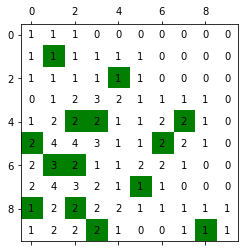

In [220]:
solve(m)